C:\Users\roman\AppData\Local\Temp\ipykernel_30588\3140390452.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_df = data_df.drop('0',1)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,4.363636,4.000000,4.057692,3.750000,4.300000,4.666667,4.220000,4.333333,4.260000,4.114754,4.062500,4.285714,0.0,0.000000,4.300000,3.000000,4.000000,4.000000,4.224138,3.937500
1,4.500000,1.000000,3.666667,5.000000,3.000000,0.000000,3.750000,0.000000,3.500000,3.571429,3.888889,3.500000,0.0,0.000000,3.500000,0.000000,3.666667,0.000000,4.333333,0.000000
2,4.666667,3.600000,3.640000,3.714286,3.428571,4.800000,3.736842,5.000000,3.923077,3.633333,3.952381,3.692308,0.0,3.666667,3.285714,0.000000,3.181818,0.000000,4.192308,4.333333
3,3.000000,4.000000,4.000000,4.000000,4.000000,3.818182,3.909091,3.000000,3.500000,3.812500,3.900000,4.250000,0.0,0.000000,4.000000,0.000000,3.833333,0.000000,3.840000,4.500000
4,4.083333,3.900000,3.748276,4.090909,3.887324,3.892857,4.085890,3.500000,3.923977,3.917040,4.093220,3.482759,0.0,4.574074,4.059524,4.750000,4.037118,4.142857,4.020134,3.814103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,3.366279,3.631313,3.362840,3.676471,3.766667,3.724490,3.509479,3.558824,3.496324,3.508969,3.456233,3.532895,0.0,3.776316,3.465517,2.875000,3.528302,3.636364,3.480826,3.644444
8037,4.076923,4.333333,3.944444,4.500000,4.714286,4.684211,3.900000,4.500000,4.220588,3.850000,4.018182,4.185185,0.0,0.000000,4.333333,4.454545,3.958333,4.375000,4.246667,4.055556
8038,3.492537,3.776596,3.671587,3.780000,3.685185,3.703704,3.298507,2.818182,3.412281,2.906250,3.610778,3.760714,0.0,4.500000,3.744898,4.033333,3.284091,3.710526,3.723553,3.390909
8039,2.023810,1.265625,1.687097,1.526786,1.213675,2.272727,1.666667,1.500000,1.898936,1.871528,1.701681,2.068627,0.0,1.944444,1.396104,3.500000,1.768116,1.000000,1.925325,1.720588


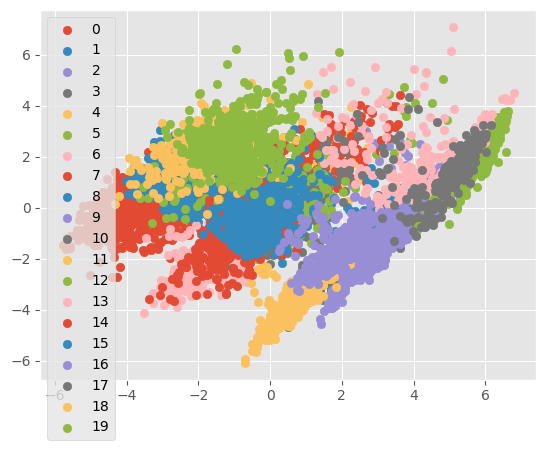

In [38]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from IPython.display import display


style.use("ggplot")
%matplotlib inline

#Load Data
data_folder = "C:/Users/Can/Desktop/dsai/recsys/groupp"
average_ratings_per_user_for_each_genre_df = pd.read_csv(data_folder + "/data.csv")
data_df = average_ratings_per_user_for_each_genre_df.fillna(0)
data_df = data_df.drop(8041)
data_df = data_df.drop('0',1)
display(data_df)

#creating groups
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters).fit(data_df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

pca = PCA(2) #change?
df = pca.fit_transform(data_df)

u_labels = np.unique(labels)

#plotting the results:
for i in u_labels:
    plt.scatter(df[labels == i , 0] , df[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [39]:
data_df['labels'] = labels

print(data_df)

             1         2         3         4         5         6         7  \
0     4.363636  4.000000  4.057692  3.750000  4.300000  4.666667  4.220000   
1     4.500000  1.000000  3.666667  5.000000  3.000000  0.000000  3.750000   
2     4.666667  3.600000  3.640000  3.714286  3.428571  4.800000  3.736842   
3     3.000000  4.000000  4.000000  4.000000  4.000000  3.818182  3.909091   
4     4.083333  3.900000  3.748276  4.090909  3.887324  3.892857  4.085890   
...        ...       ...       ...       ...       ...       ...       ...   
8036  3.366279  3.631313  3.362840  3.676471  3.766667  3.724490  3.509479   
8037  4.076923  4.333333  3.944444  4.500000  4.714286  4.684211  3.900000   
8038  3.492537  3.776596  3.671587  3.780000  3.685185  3.703704  3.298507   
8039  2.023810  1.265625  1.687097  1.526786  1.213675  2.272727  1.666667   
8040  3.000000  3.333333  3.071429  3.250000  3.000000  3.000000  3.300000   

             8         9        10  ...        12   13        1

In [40]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []
group9 = []
group10 = []
group11 = []
group12 = []
group13 = []
group14 = []
group15 = []
group16 = []
group17 = []
group18 = []
group19 = []
group20 = []

for i in range(0, data_df.shape[0]):
    if(data_df.at[i, 'labels']) == 0:
        group1.append(i)
    if(data_df.at[i, 'labels']) == 1:
        group2.append(i)
    if(data_df.at[i, 'labels']) == 2:
        group3.append(i)
    if(data_df.at[i, 'labels']) == 3:
        group4.append(i)
    if(data_df.at[i, 'labels']) == 4:
        group5.append(i)
    if(data_df.at[i, 'labels']) == 5:
        group6.append(i)
    if(data_df.at[i, 'labels']) == 6:
        group7.append(i)
    if(data_df.at[i, 'labels']) == 7:
        group8.append(i)
    if(data_df.at[i, 'labels']) == 8:
        group9.append(i)
    if(data_df.at[i, 'labels']) == 9:
        group10.append(i)
    if(data_df.at[i, 'labels']) == 10:
        group11.append(i)
    if(data_df.at[i, 'labels']) == 11:
        group12.append(i)
    if(data_df.at[i, 'labels']) == 12:
        group13.append(i)
    if(data_df.at[i, 'labels']) == 13:
        group14.append(i)
    if(data_df.at[i, 'labels']) == 14:
        group15.append(i)
    if(data_df.at[i, 'labels']) == 15:
        group16.append(i)
    if(data_df.at[i, 'labels']) == 16:
        group17.append(i)
    if(data_df.at[i, 'labels']) == 17:
        group18.append(i)
    if(data_df.at[i, 'labels']) == 18:
        group19.append(i)
    if(data_df.at[i, 'labels']) == 19:
        group20.append(i)


print(group1)
print(group2)
print(group3)
print(group4)
print(group5)
print(group6)
print(group7)
print(group8)
print(group9)
print(group10)
print(group11)
print(group12)
print(group13)
print(group14)
print(group15)
print(group16)
print(group17)
print(group18)
print(group19)
print(group20)

[4, 19, 24, 49, 56, 80, 94, 106, 124, 129, 141, 156, 166, 167, 171, 188, 198, 199, 210, 234, 236, 237, 242, 248, 257, 281, 284, 285, 295, 304, 307, 312, 313, 320, 347, 358, 380, 397, 401, 412, 416, 422, 426, 446, 447, 450, 473, 530, 536, 539, 554, 562, 568, 569, 574, 578, 583, 594, 608, 616, 617, 626, 629, 638, 649, 658, 660, 662, 664, 669, 691, 692, 693, 703, 710, 719, 734, 739, 742, 747, 755, 760, 767, 779, 781, 790, 801, 809, 821, 823, 824, 839, 849, 853, 928, 939, 940, 946, 951, 953, 958, 959, 965, 967, 970, 978, 998, 1001, 1003, 1004, 1019, 1024, 1029, 1044, 1054, 1076, 1077, 1078, 1083, 1088, 1089, 1094, 1111, 1112, 1118, 1129, 1136, 1137, 1140, 1142, 1146, 1171, 1198, 1205, 1238, 1261, 1271, 1285, 1298, 1299, 1317, 1351, 1355, 1356, 1366, 1381, 1385, 1392, 1401, 1402, 1412, 1421, 1422, 1423, 1430, 1431, 1438, 1448, 1452, 1458, 1459, 1461, 1476, 1484, 1487, 1489, 1490, 1491, 1499, 1500, 1501, 1506, 1518, 1524, 1526, 1534, 1536, 1539, 1545, 1549, 1551, 1562, 1584, 1585, 1594, 1612

In [41]:
group_1 = pd.DataFrame(index=range(len(group1)),columns=range(len(group1)))
for i in range(0, group_1.shape[0]):
    group_1.at[i, 0] = group1[i]

print(group_1)

movies_genres_df = pd.read_csv(data_folder + "/genre.csv")
movies_genres_df = movies_genres_df.set_index('item')

def prediction(movie_id, user_id, movies_genres_df, data_df):
    genres = movies_genres_df.columns
    genres = list(genres)
    genres = genres[1:]
    print(genres)
    output = []
    prediction = 0
    for genre in genres:
        if movies_genres_df.at[movie_id, genre] == True:
            output.append(genre)
    print(output)
    for i in range(0, len(output)):
        element = output[i]
        print(element)
        index = genres.index(element)
        print(index)
        prediction = prediction + data_df.iat[user_id, index]
        print(prediction)

    return prediction / len(output)

test = prediction(1, 1, movies_genres_df, data_df)
print(test)

      0    1    2    3    4    5    6    7    8    9    ...  924  925  926  \
0       4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1      19  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2      24  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3      49  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4      56  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
929  7994  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
930  8006  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
931  8007  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
932  8008  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
933  8011  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

     927  928  929  930  931  932  933  
0    NaN  NaN  NaN  Na

In [ ]:
#preparing movies
movies = pd.read_csv(data_folder + "/movie.csv")
movies_df = movies.rename(columns={'movieId': 'movie_id', 'title': 'title', 'genres': 'genres'})
movies_df = movies_df[['movie_id', 'title', 'genres']]

#preparing ratings
ratings = pd.read_csv(data_folder + "/rating.csv")
ratings_df = ratings.rename(columns={'userId': 'user_id', 'movieId': 'movie_id', 'rating': 'rating', 'timestamp': 'timestamp'})
ratings_df = ratings_df[['user_id', 'movie_id', 'rating']]

movies_df = movies_df.drop_duplicates(subset='title', keep='first')

# Join the ratings to the genres
ratings_genres_df = pd.merge(movies_df, ratings_df,  how='inner', left_on=['movie_id'], right_on = ['movie_id'])
ratings_genres_df = ratings_genres_df[['movie_id', 'user_id', 'rating', 'title', 'genres']]


In [67]:
for i in range(0,group_1.shape[0]):
    print("New user")

    u_id = 0
    u_id = group_1.at[i, 'user_id']

    curr_user = 0
    curr_user = group_1.loc[i]
    #display(curr_user)

    #curr_seen_movies = pd.join(curr_user, ratings_genres_df, how='inner', left_on=['user_id'], right_on=['user_id'])
    #display(ratings_genres_df)

    #curr_seen_movies = ratings_genres_df.merge(curr_user, how = 'right', on = 'user_id')
    curr_seen_movies = ratings_genres_df.loc[ratings_genres_df['user_id'] == u_id]

    for col in range(1,group_1.shape[1]):

        mov_id = 0
        mov_id = group_1.columns[col]
        #if not(mov_id in curr_seen_movies['movie_id']):
        pred = prediction(mov_id, u_id, movies_genres_df, data_df)
        group_1.at[i, group_1.columns[col]] = pred

        #else:
        #    mov_index = 0
        #    mov_index_series = curr_seen_movies.loc['movie_id']
        #    display(mov_index_series)
        #    for j in range(0,mov_index_series.size):
        #        if mov_index_series.at[j,'movie_id'] == mov_id:
        #            mov_index = j
        #            break

        #   group_1.at[i, group_1.columns[col]] = curr_seen_movies.at[movie_index,'rating']

display(group_1)


0        4
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
929    NaN
930    NaN
931    NaN
932    NaN
933    NaN
Name: 0, Length: 934, dtype: object

0        4
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
929    NaN
930    NaN
931    NaN
932    NaN
933    NaN
Name: 0, Length: 934, dtype: object

0                               4
movie_id                      6.0
user_id                       4.0
rating                        3.0
title                 Heat (1995)
genres      Action|Crime|Thriller
Name: 0, dtype: object

ball
ball
ball
ball
ball


0                                4
movie_id                     350.0
user_id                        4.0
rating                         4.0
title           Client, The (1994)
genres      Drama|Mystery|Thriller
Name: 6, dtype: object

ball
ball
ball


0                                                   4
movie_id                                        370.0
user_id                                           4.0
rating                                            4.0
title       Naked Gun 33 1/3: The Final Insult (1994)
genres                                  Action|Comedy
Name: 10, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball


0                                            4
movie_id                                 519.0
user_id                                    4.0
rating                                     3.0
title                         RoboCop 3 (1993)
genres      Action|Crime|Drama|Sci-Fi|Thriller
Name: 19, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 32, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 91, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 165, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 221, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 323, dtype: object

ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 329, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 350, dtype: object

ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 356, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 367, dtype: object

0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 368, dtype: object

ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 370, dtype: object

ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 377, dtype: object

ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 380, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 420, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 431, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 440, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 454, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 480, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 489, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 519, dtype: object

0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 520, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 531, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 548, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 557, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 578, dtype: object

ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 586, dtype: object

ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 589, dtype: object

ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 594, dtype: object

ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 596, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 622, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 646, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 669, dtype: object

ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 677, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 686, dtype: object

ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 689, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 733, dtype: object

ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 740, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 811, dtype: object

ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 817, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 863, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0           NaN
movie_id    NaN
user_id     NaN
rating      NaN
title       NaN
genres      NaN
Name: 883, dtype: object

ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball
ball


0       19
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
929    NaN
930    NaN
931    NaN
932    NaN
933    NaN
Name: 1, Length: 934, dtype: object

0       19
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
929    NaN
930    NaN
931    NaN
932    NaN
933    NaN
Name: 1, Length: 934, dtype: object

KeyError: 0

In [ ]:
##aggregation strategy for a group(fairness):

agg_group = group_1.join(expert_users.set_index('user'), on = 'user')
agg_group = agg_group.sort_values(by = ['num_ratings'], ascending=False)

rec_list = []
for i in agg_group.index.size:
    temp_mov_id = agg_group.at[index[i],columns[i]]
    rec_list.append(movies_df.at[(temp_mov_id-1),'title'])

print(rec_list)